In [2]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/audio/fold1/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
label_dict = {0 : 'air conditioner',
              1 : 'car horn', 
              2 : 'children playing', 
              3 : 'dog bark', 
              4 : 'drilling', 
              5 : 'engine idling',
              6 : 'gun shot',
              7 : 'jackhammer',
              8 : 'siren',
              9 : 'street music'
}

In [4]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


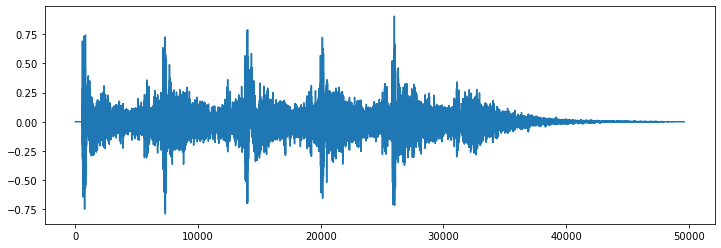

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

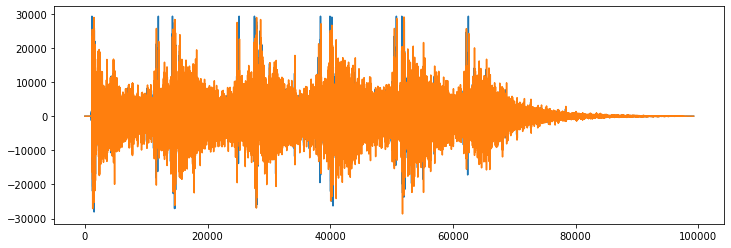

In [8]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [10]:
mfccs

array([[-9.3800201e+01,  7.4964690e+00,  1.5476104e+01, ...,
        -5.6935333e+02, -5.9172742e+02, -6.1055634e+02],
       [ 3.0774035e+01,  2.3719746e+01,  1.1416364e+01, ...,
         4.3051193e+01,  2.5888165e+01,  1.2927567e+01],
       [-3.2866511e+00, -1.2030355e+01, -1.5005075e+01, ...,
        -1.1103720e+01, -7.5504932e+00,  2.2212185e-01],
       ...,
       [ 6.4266574e-01, -3.2603276e+00, -4.7559185e+00, ...,
         2.4095767e+00,  3.1699090e+00, -1.5433559e-01],
       [-1.0001828e+01, -9.3599148e+00, -6.4467359e+00, ...,
        -5.0200999e-02,  7.2893935e-01, -8.3965683e-01],
       [ 1.9421935e+00,  2.0736120e+00,  3.0683599e+00, ...,
        -2.0609179e+00, -2.2312026e+00, -1.7239641e+00]], dtype=float32)

In [11]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [02:47, 21.55it/s]/Users/dominikzeman/opt/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [06:23, 22.71it/s]/Users/dominikzeman/opt/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/Users/dominikzeman/opt/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [06:41, 21.76it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [15]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:
X.shape

(8732, 40)

In [17]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [18]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777870e+00, -1.9530845e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321609e+00]], dtype=float32)

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

In [27]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
### No of classes
num_labels=y.shape[1]

In [30]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

2022-03-08 14:34:44.761203: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 10.8528 - accuracy: 0.1226
Epoch 1: val_loss improved from inf to 2.29577, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 10.6276 - accuracy: 0.1221 - val_loss: 2.2958 - val_accuracy: 0.1093
Epoch 2/100
191/219 [=========================>....] - ETA: 0s - loss: 2.5308 - accuracy: 0.1135
Epoch 2: val_loss improved from 2.29577 to 2.28315, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.5122 - accuracy: 0.1150 - val_loss: 2.2832 - val_accuracy: 0.1093
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3337 - accuracy: 0.1187
Epoch 3: val_loss improved from 2.28315 to 2.26490, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.3332 - accuracy: 0.1187 - val_loss: 2.2649 - val_accuracy: 0.12

219/219 [==============================] - 0s 2ms/step - loss: 1.4994 - accuracy: 0.4637 - val_loss: 1.2786 - val_accuracy: 0.5861
Epoch 26/100
194/219 [=========================>....] - ETA: 0s - loss: 1.4650 - accuracy: 0.4866
Epoch 26: val_loss improved from 1.27860 to 1.25892, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.4665 - accuracy: 0.4858 - val_loss: 1.2589 - val_accuracy: 0.5890
Epoch 27/100
178/219 [=======================>......] - ETA: 0s - loss: 1.4466 - accuracy: 0.4916
Epoch 27: val_loss improved from 1.25892 to 1.23044, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.4406 - accuracy: 0.4959 - val_loss: 1.2304 - val_accuracy: 0.5936
Epoch 28/100
179/219 [=======================>......] - ETA: 0s - loss: 1.4057 - accuracy: 0.5126
Epoch 28: val_loss improved from 1.23044 to 1.17735, saving model to saved_models/audio_classific

214/219 [============================>.] - ETA: 0s - loss: 1.1106 - accuracy: 0.6250
Epoch 51: val_loss improved from 0.93104 to 0.92675, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.1099 - accuracy: 0.6258 - val_loss: 0.9267 - val_accuracy: 0.6903
Epoch 52/100
215/219 [============================>.] - ETA: 0s - loss: 1.1126 - accuracy: 0.6170
Epoch 52: val_loss improved from 0.92675 to 0.90370, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.1155 - accuracy: 0.6170 - val_loss: 0.9037 - val_accuracy: 0.7052
Epoch 53/100
213/219 [============================>.] - ETA: 0s - loss: 1.1098 - accuracy: 0.6203
Epoch 53: val_loss did not improve from 0.90370
219/219 [==============================] - 0s 1ms/step - loss: 1.1056 - accuracy: 0.6213 - val_loss: 0.9088 - val_accuracy: 0.7052
Epoch 54/100
178/219 [=======================>......] - ETA: 0

183/219 [========================>.....] - ETA: 0s - loss: 1.0104 - accuracy: 0.6525
Epoch 78: val_loss did not improve from 0.79789
219/219 [==============================] - 0s 1ms/step - loss: 1.0007 - accuracy: 0.6537 - val_loss: 0.8233 - val_accuracy: 0.7304
Epoch 79/100
187/219 [========================>.....] - ETA: 0s - loss: 1.0138 - accuracy: 0.6566
Epoch 79: val_loss did not improve from 0.79789
219/219 [==============================] - 0s 1ms/step - loss: 1.0062 - accuracy: 0.6593 - val_loss: 0.8016 - val_accuracy: 0.7481
Epoch 80/100
182/219 [=======================>......] - ETA: 0s - loss: 0.9887 - accuracy: 0.6580
Epoch 80: val_loss improved from 0.79789 to 0.79352, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.9892 - accuracy: 0.6581 - val_loss: 0.7935 - val_accuracy: 0.7550
Epoch 81/100
185/219 [========================>.....] - ETA: 0s - loss: 0.9824 - accuracy: 0.6645
Epoch 81: val_loss did n

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.757870614528656


In [35]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [36]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.74158096,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.8877535 ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015264 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529805,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419801  ,   -0.5791614 ,
         -1.2440349 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [37]:
#model.predict_classes(X_test)

In [39]:
filename='UrbanSound8K/audio/fold3/6988-5-0-1.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = np.argmax(predicted_label, axis=1)
print(label_dict[prediction_class[0]])

[-124.41564     162.64157     -33.432667     27.59999       6.6116724
   21.610598      2.9962502    19.552324      1.294804     17.197958
   -1.8212044    13.08889       3.2787871     3.667115      0.96994126
    7.140642     -0.7302965     4.0208635     3.9708393     3.6621003
    4.8365865     4.4332657     4.394522      2.5353334     8.956006
    3.222451      6.7038193     4.445663      6.2371874     4.125844
    3.1068814     1.4973228     1.8097677     0.9489547     2.7819495
    2.6311927     4.027545      1.5059777     3.3667514     3.2168236 ]
[[-124.41564     162.64157     -33.432667     27.59999       6.6116724
    21.610598      2.9962502    19.552324      1.294804     17.197958
    -1.8212044    13.08889       3.2787871     3.667115      0.96994126
     7.140642     -0.7302965     4.0208635     3.9708393     3.6621003
     4.8365865     4.4332657     4.394522      2.5353334     8.956006
     3.222451      6.7038193     4.445663      6.2371874     4.125844
     3.1068814  